##### Welcome everyone!

##### In this notebook, I have uploaded a large dataset of mall customers from an anonymous mall. I believe the dataset was originaly uploaded in Udemy; however, I have seen this dataset in multiple locations around the web. The purpose of this notebook is to identify target shopper groups in our dataset; by using a Machine Learning algorithm called Clustering. 

##### This raw dataset includes information about each customer in the mall; however, our goal is to create clusters so that we are able to define specific target groups.

##### Throughout this notebook you will find that I use several Python packages, which will need to be imported. You will also find several visualization graphs of the data for data exploratory purposes.

##### Please let me know if you have any questions and connect with me on the following platforms:

Contact Information:
- github.com/CarlosBusiness
- Linkedin: www.linkedin.com/in/CarlosJonesData
- Twitter: Los The Scientist
- Email: carlosjones.business@gmail.com

##### Before I begin any type of analysis, I like to import each package that I know I will use at somepoint in the notebook. Please find imported packages below.

In [210]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
from sklearn.cluster import KMeans

In [176]:
#Upload my CSV dataset
mall=pd.read_csv('Mall_Customers.csv')
mall.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [177]:
#Lets checkout some quick information on the dataset
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [178]:
#Just rounding to make the numbers a little easier on the eyes
round(mall.describe())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.0,39.0,61.0,50.0
std,58.0,14.0,26.0,26.0
min,1.0,18.0,15.0,1.0
25%,51.0,29.0,42.0,35.0
50%,100.0,36.0,62.0,50.0
75%,150.0,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


In [179]:
#A quick look at our columns
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [180]:
#A quick look at how many rows and columns we have
mall.shape

(200, 5)

In [181]:
mall.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [182]:
mall.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [183]:
#Just curious what the average Annual Income is for each gender
mall.groupby('Gender')['Annual Income (k$)'].mean()

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

Data Visualization

In [184]:
#Since each row represents only 1 customer, I would like to make my Customer ID column the Index.
mall.set_index('CustomerID', inplace = True) 

In [185]:
mall.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [186]:
#Interested to learn if there are any correlated columns in this dataset
corm=mall.corr()
corm

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

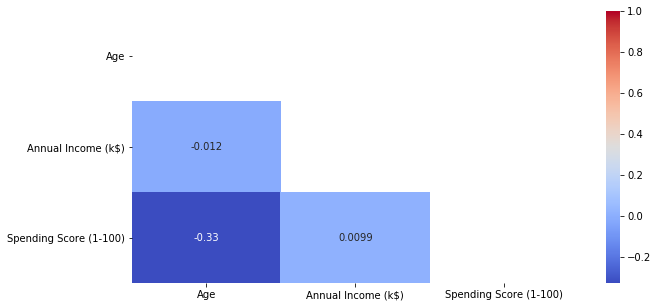

In [188]:
#Let's create a Heatmap in order to make correlations mor e visually appealing
masko= np.zeros_like(corm, dtype=np.bool)
masko[np.triu_indices_from(masko)]=True

fig,axes= plt.subplots(figsize = (10,5))
sns.heatmap(corm, mask = masko, cmap = 'coolwarm', annot=True)
plt.show

Text(0.5, 1.0, 'Annual Income (k$) Histogram')

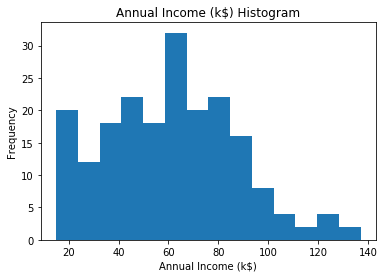

In [195]:
#I would like to see a Histogram of our shoppers Annual Income
mall['Annual Income (k$)'].hist(bins=14, grid=False)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Annual Income (k$) Histogram')

Text(0.5, 1.0, 'Annual Income (k$) Histogram')

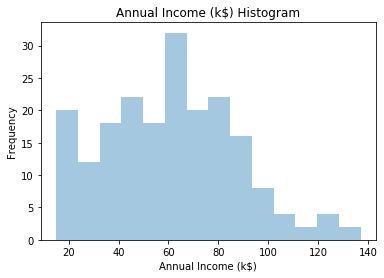

In [192]:
#Another way of creating our Histogram
sns.distplot(mall['Annual Income (k$)'], kde=False, bins=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Annual Income (k$) Histogram')

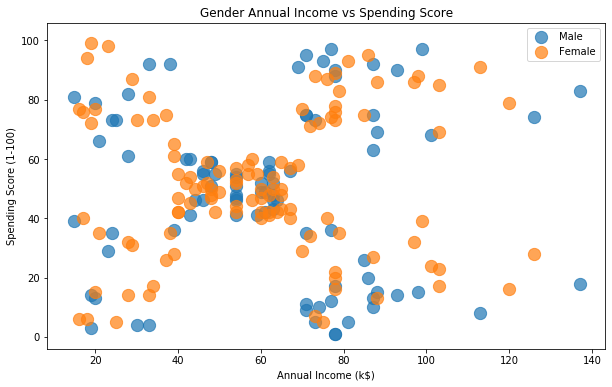

In [198]:
#Let's create a Scatterplot showing the relationship between 'Annual Income (k$)' and 'Spending Score (1-100)'
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = mall[mall['Gender'] == gender] ,s = 150 , alpha = 0.7 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Gender Annual Income vs Spending Score')
plt.legend()
plt.show()

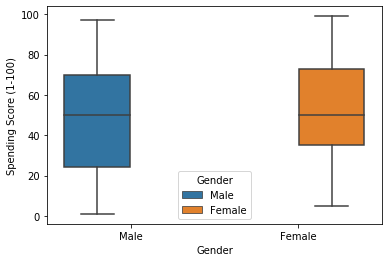

In [68]:
#Quick 'Spending Power (1-100)' boxplot by gender
sns.boxplot(x='Gender', y='Spending Score (1-100)', data= mall, hue='Gender') #BoxPlot for Gender and Spending Scores

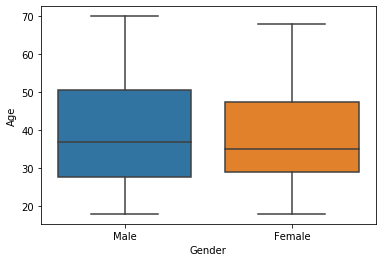

In [70]:
#Quick 'Age' boxplot by gender
sns.boxplot(x='Gender', y='Age', data=mall) #Boxplot for Gender and Age

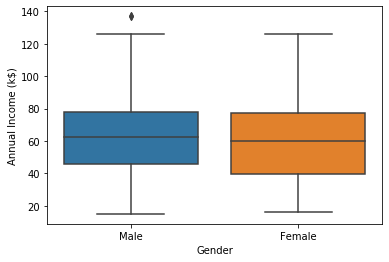

In [200]:
#Quick 'Annual Income' boxplot by gender
sns.boxplot(x='Gender', y='Annual Income (k$)', data =mall)

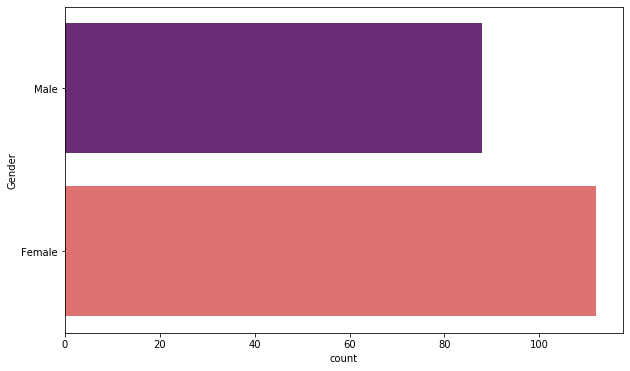

In [168]:
#Quick Countplot of each gender
plt.figure(1, figsize=(10,6))
sns.countplot(y='Gender', data=mall, palette='magma')#CountPlot

In [203]:
#Lets find clusters between Age and Spending Score
X1 = mall[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

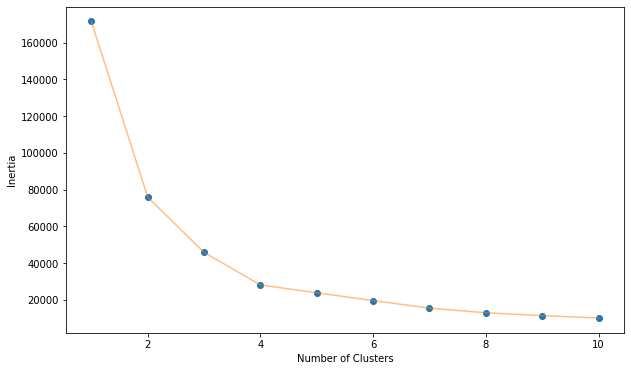

In [114]:
#Lets plot our Elbow Graph
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [118]:
#Lets grab our center coordinates
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1=algorithm.predict(X1)
algorithm_center = algorithm.cluster_centers_
algorithm_center

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

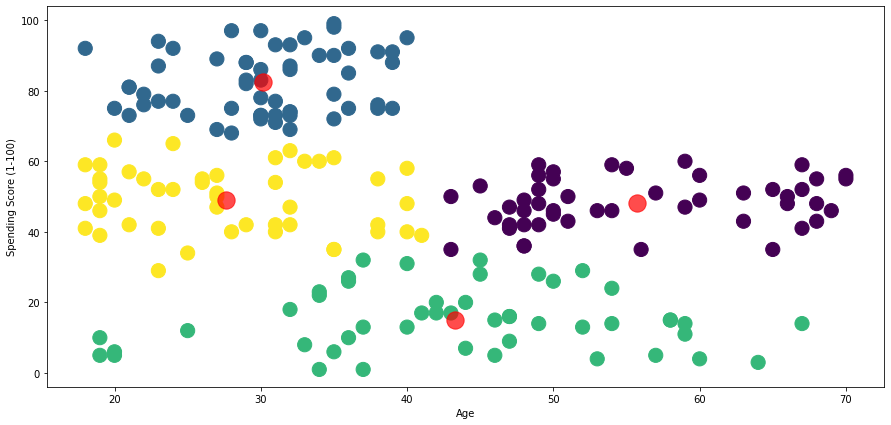

In [204]:
plt.figure(1 , figsize = (15 , 7) )

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = mall , c = labels1 , 
            s = 200 )
plt.scatter(x = algorithm_center[: , 0] , y =  algorithm_center[: , 1] , s = 300 , c = 'red' , alpha = 0.7)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)')
plt.show()

In [205]:
#Lets find clusters between Annual Income and Spending Score
'''Age and spending Score'''
X2 = mall[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

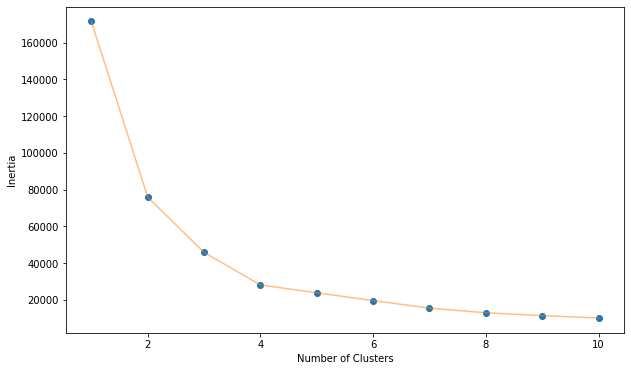

In [206]:
#Let's plot our Elbow graph
plt.figure(1, figsize =(10,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [138]:
#Lets grab our center coordinates for Annual Income and Spending Power
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2=algorithm.predict(X2)
algorithm_center2 = algorithm.cluster_centers_
algorithm_center2

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

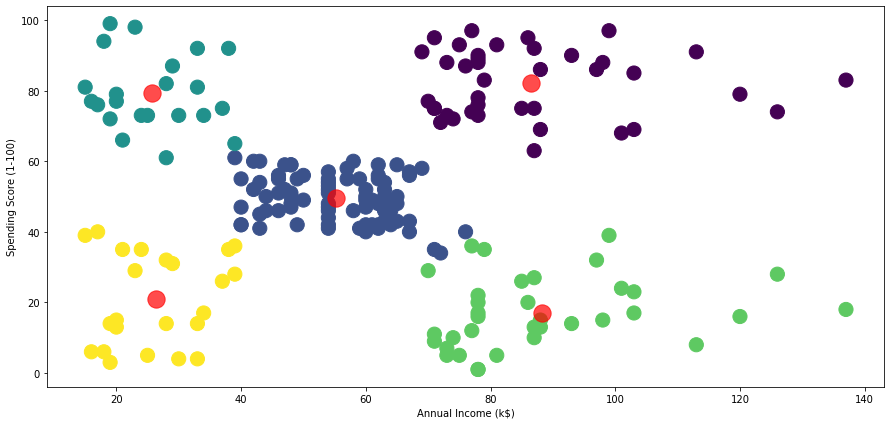

In [208]:
plt.figure(1 , figsize = (15 , 7) )


plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = mall , c = labels2 , 
            s = 200 )
plt.scatter(x = algorithm_center2[: , 0] , y =  algorithm_center2[: , 1] , s = 300 , c = 'red' , alpha = 0.7)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.show()

In [154]:
#Lets add our first cluster to the Dataframe
mall['cluster 1']=labels1
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster 1,cluster 2
CustomerID,,,,,,
1,Male,19,15,39,3,4
2,Male,21,15,81,1,2
3,Female,20,16,6,2,4
4,Female,23,16,77,1,2
5,Female,31,17,40,3,4
...,...,...,...,...,...,...
196,Female,35,120,79,1,0
197,Female,45,126,28,2,3
198,Male,32,126,74,1,0


In [153]:
#Lets add our 2nd cluster to the DataFrame
mall['cluster 2']= labels2
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster 1,cluster 2
CustomerID,,,,,,
1,Male,19,15,39,3,4
2,Male,21,15,81,1,2
3,Female,20,16,6,2,4
4,Female,23,16,77,1,2
5,Female,31,17,40,3,4
...,...,...,...,...,...,...
196,Female,35,120,79,1,0
197,Female,45,126,28,2,3
198,Male,32,126,74,1,0


In [162]:
#Grouping by clusters 
mall.groupby('cluster 1')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().sort_values(by = 'Annual Income (k$)', ascending = False)

,Age,Annual Income (k$),Spending Score (1-100)
cluster 1,,,
2,43.291667,66.937500,15.020833
1,30.175439,66.070175,82.350877
0,55.708333,54.770833,48.229167
3,27.617021,53.276596,49.148936


In [159]:
mall.groupby('cluster 2')[['Spending Score (1-100)', 'Annual Income (k$)']].mean().sort_values(by = 'Annual Income (k$)', ascending = False)

,Spending Score (1-100),Annual Income (k$)
cluster 2,,
3,17.114286,88.200000
0,82.128205,86.538462
1,49.518519,55.296296
4,20.913043,26.304348
2,79.363636,25.727273
